<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [11]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


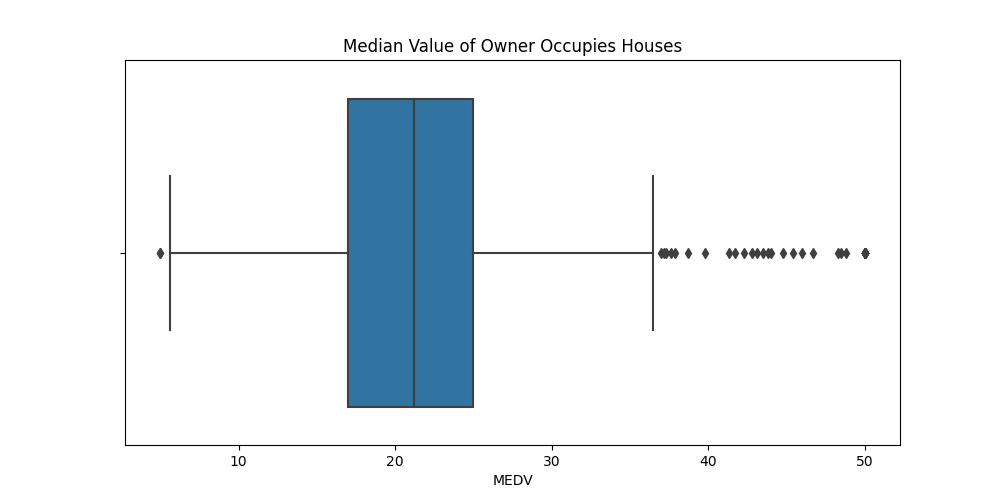

In [12]:
#for the median value of owner occupied homes 

plt.figure(figsize=(10,5))
sns.boxplot(x= boston_df.MEDV)
plt.title('Median Value of Owner Occupies Houses')
plt.show()

The median is quite low but there are many outliers in the 40 and 50 range 


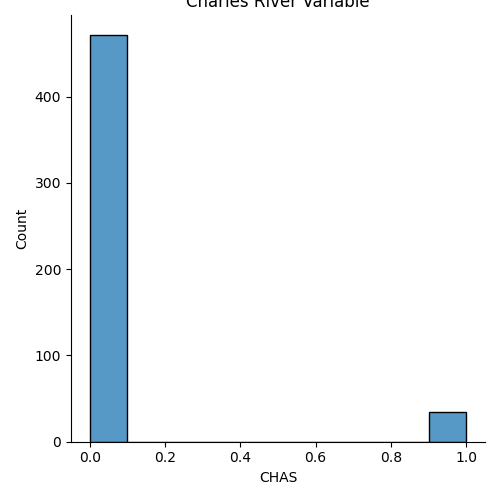

In [13]:
# bar chart for the charles river variable 

plt.figure(figsize=(10,10))
sns.displot(x = boston_df.CHAS, bins = 10, kde=False)
plt.title('Charles River Variable')
plt.show()

Majority of the Charles Variables are outside of the scope 


In [14]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, 
 #between 35 and 70 years and 70 years and older)
    
boston_df.loc[(boston_df["AGE"] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 or older'

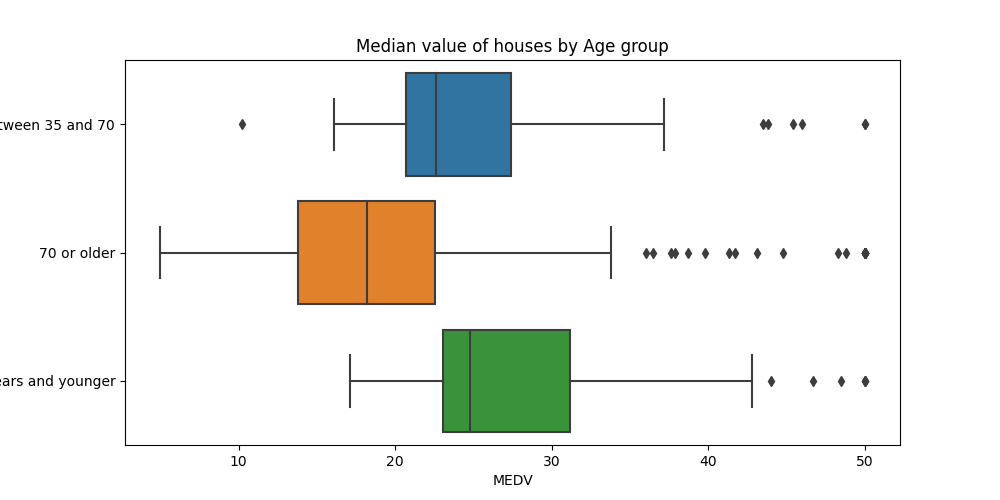

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV, y = boston_df.age_group, data = boston_df)
plt.title('Median value of houses by Age group')
plt.show()

The graph show that individuals 35 and younger have a higher median house price, and those 70 and older have the lowerst home value 

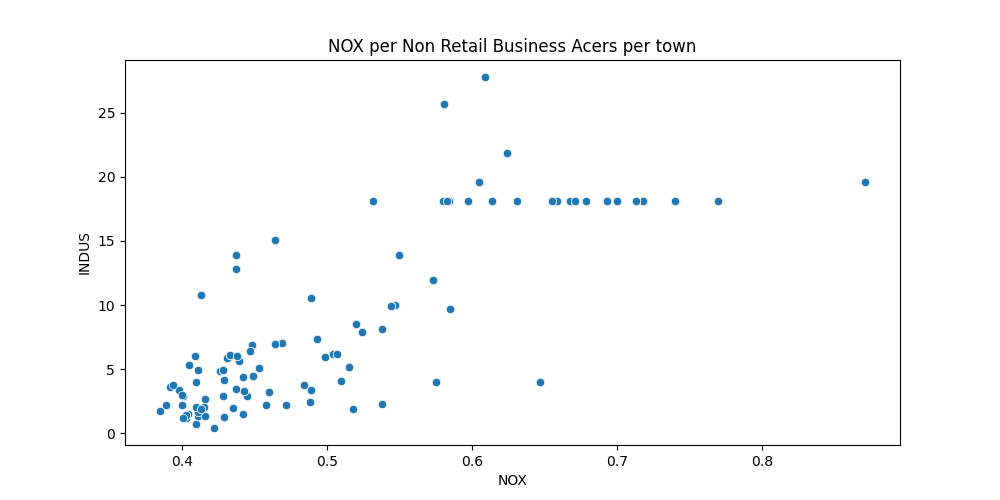

In [16]:
#Provide a scatter plot to show the relationship between
#Nitric oxide concentrations and the proportion of non-retail business acres per town. 



plt.figure(figsize = (10,5))
sns.scatterplot(x = boston_df.NOX, y = boston_df.INDUS, data = boston_df)
plt.title('NOX per Non Retail Business Acers per town')
plt.show()

It looks like a positive linear relationship up until 0.6 NOX then it flattens out 

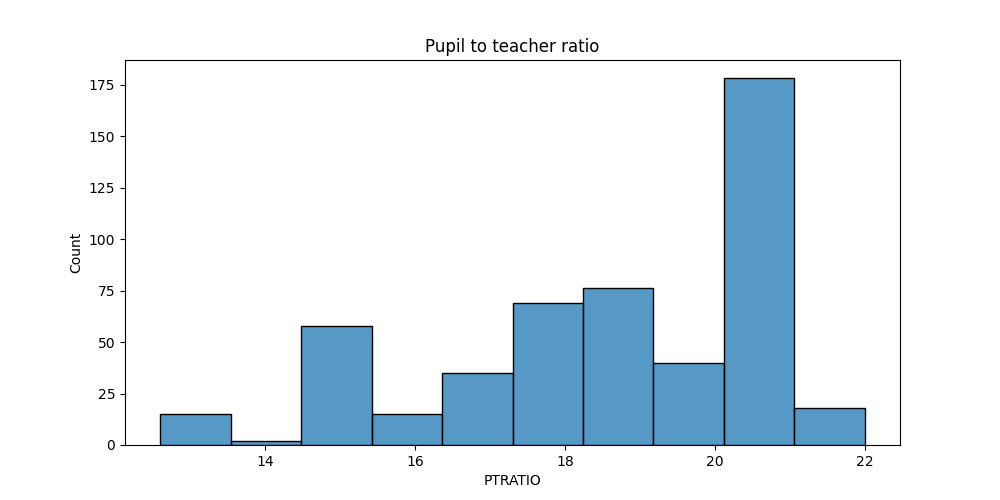

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(x = boston_df.PTRATIO, bins=10, kde=False)
plt.title("Pupil to teacher ratio")
plt.show()

In [18]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? 
#(T-test for independent samples)

boston_df['CHAS'].value_counts()


0.0    471
1.0     35
Name: CHAS, dtype: int64

Null: both average MEDV are the same \
Alternative: the MEDV are different 

In [19]:
a = boston_df[boston_df['CHAS'] == 0]['MEDV']
b = boston_df[boston_df['CHAS'] == 1]['MEDV']

In [20]:
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

The p value is well over the 0.05 point so we fail to reject the Null hypothesis 
as there is no statistical significance 

In [21]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied
#units built prior to 1940 (AGE)? (ANOVA)



Null: Median values of homes are the same \
Alternative: Median values of homes are not the same 

In [22]:
low = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
medium = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
high = boston_df[boston_df['age_group'] == '70 or older']['MEDV']

In [23]:
f_stats, p_value = scipy.stats.f_oneway(low,medium,high,axis=0)

In [24]:
print('F-Statistic = {0}, P-value = {1}'.format(f_stats, p_value))

F-Statistic = 36.40764999196599, P-value = 1.7105011022702984e-15


The p value is over the 0.05 point so we fail to reject the null hypothesis showing there is no
statistical significance.


In [25]:
#  can we conclude that there is no relationship between Nitric oxide concentrations and proportion of 
# non-retail business acres per town? (Pearson Correlation)



Null: NOX is not correlated with INDUS \
Alternative: NOX is correlated with INDUS

In [26]:
pearson,p_value = scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

In [27]:
print('Pearson Coefficient value={0}, P-value={1}'.format(pearson, p_value))

Pearson Coefficient value=0.7636514469209189, P-value=7.913361061211254e-98


The 2 tailed p value is less than 0.05 we reject the nully hypothesis supporting the claim that there is statistical significane between the NOX and INDUS

In [28]:
# What is the impact of an additional weighted distance  to the five Boston employment centres 
# on the median value of owner occupied homes? (Regression analysis)



Null: weighted distance of the five boston employment centers are not related to median value \
Alternative: the median in related to the weighted distance on boston employment centers

In [29]:
X = boston_df['DIS']
Y = boston_df['MEDV']

In [30]:
x = sm.add_constant(X)

In [31]:
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                   1.52e-146
Time:                        09:17:57   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
np.sqrt(0.062) #pearson coefficient values 

0.24899799195977465

The perason coefficient is 0.25 and shows a weak correlation between the two 